In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("air quality data.csv")
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
df.sample(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
25062,Patna,2018-09-11,57.38,NaN,9.91,38.85,16.07,NaN,0.46,31.92,57.12,1.91,32.98,6.87,89.0,Satisfactory
27251,Thiruvananthapuram,2018-04-06,33.37,72.54,1.80,12.99,8.30,4.81,1.01,11.26,55.60,NaN,NaN,NaN,NaN,NaN
9865,Coimbatore,2019-07-04,40.89,49.26,9.23,9.57,18.79,NaN,1.11,10.44,16.05,0.05,0.25,NaN,64.0,Satisfactory
29381,Visakhapatnam,2020-02-03,39.45,54.88,2.94,18.85,12.42,10.25,0.88,8.38,66.17,2.81,4.93,0.49,76.0,Satisfactory
15733,Hyderabad,2018-03-01,54.84,127.04,14.31,65.26,46.13,21.27,1.12,11.14,37.91,2.69,19.29,3.40,124.0,Moderate
28208,Visakhapatnam,2016-11-17,76.40,120.03,3.77,31.02,18.94,11.23,1.14,12.94,97.23,5.33,8.33,3.51,151.0,Moderate
14337,Guwahati,2019-11-01,38.53,124.06,29.12,14.21,63.04,3.89,0.72,9.65,17.80,0.01,NaN,NaN,142.0,Moderate
11471,Delhi,2018-05-27,97.37,314.96,31.92,58.31,57.05,35.05,1.10,11.59,56.75,3.73,4.64,0.00,268.0,Poor
25636,Patna,2020-04-07,44.93,112.36,43.36,48.88,59.45,11.56,1.64,11.83,20.63,0.15,4.09,0.38,142.0,Moderate
18468,Jorapokhar,2019-05-27,NaN,86.47,8.12,8.09,NaN,6.68,2.84,10.09,14.59,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [5]:
df.shape

(29531, 16)

In [6]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [7]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [8]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [10]:
df['City'].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [11]:
type(df.City)

pandas.core.series.Series

In [15]:
df.loc[500]

City           Ahmedabad
Date          2016-05-15
PM2.5                NaN
PM10                 NaN
NO                   NaN
NO2                  NaN
NOx                  NaN
NH3                  NaN
CO                   NaN
SO2                  NaN
O3                   NaN
Benzene              NaN
Toluene              NaN
Xylene               NaN
AQI                  NaN
AQI_Bucket           NaN
Name: 500, dtype: object

In [18]:
df[df['AQI_Bucket'] == "Good"]

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
204,Ahmedabad,2015-07-24,29.22,NaN,0.06,9.57,7.77,NaN,0.06,13.58,5.08,1.37,3.65,0.32,48.0,Good
2015,Aizawl,2020-03-17,27.32,35.75,3.07,2.14,3.41,24.57,0.48,4.84,6.03,0.25,1.34,NaN,40.0,Good
2033,Aizawl,2020-04-04,24.05,41.95,2.97,0.25,3.79,21.60,0.26,8.16,11.09,0.08,0.42,NaN,43.0,Good
2034,Aizawl,2020-04-05,26.47,33.51,2.96,0.08,3.50,26.00,0.31,8.79,5.76,10.03,10.52,NaN,44.0,Good
2035,Aizawl,2020-04-06,35.13,43.65,2.96,0.15,3.69,25.10,0.31,8.49,7.94,0.12,0.52,NaN,48.0,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29499,Visakhapatnam,2020-05-31,21.22,79.53,2.38,24.88,14.92,11.03,0.57,5.43,17.49,2.08,4.53,0.92,40.0,Good
29501,Visakhapatnam,2020-06-02,9.91,43.30,2.81,19.91,12.60,9.16,0.47,8.78,19.68,1.37,3.44,0.73,50.0,Good
29525,Visakhapatnam,2020-06-26,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0,Good
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good


In [19]:
df.AQI_Bucket.unique()

array([nan, 'Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory',
       'Good'], dtype=object)

In [20]:
df[df['AQI_Bucket'] == "Severe"]

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
30,Ahmedabad,2015-01-31,94.52,NaN,24.39,32.66,52.61,NaN,24.39,67.39,111.33,0.24,0.01,7.67,514.0,Severe
31,Ahmedabad,2015-02-01,135.99,NaN,43.48,42.08,84.57,NaN,43.48,75.23,102.70,0.40,0.04,25.87,782.0,Severe
32,Ahmedabad,2015-02-02,178.33,NaN,54.56,35.31,72.80,NaN,54.56,55.04,107.38,0.46,0.06,35.61,914.0,Severe
33,Ahmedabad,2015-02-03,139.70,NaN,30.61,28.40,56.73,NaN,30.61,33.79,73.60,0.17,0.03,11.87,660.0,Severe
43,Ahmedabad,2015-02-13,103.36,NaN,18.18,39.56,57.33,NaN,18.18,80.43,40.11,11.29,24.35,3.35,510.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26454,Talcher,2019-02-15,68.38,336.82,35.57,NaN,29.15,7.66,2.52,16.17,7.50,0.00,NaN,NaN,425.0,Severe
26461,Talcher,2019-02-22,116.52,768.16,27.89,NaN,24.94,7.23,4.20,16.71,3.71,0.00,NaN,NaN,437.0,Severe
26463,Talcher,2019-02-24,71.07,369.02,32.85,NaN,27.66,7.52,2.96,6.63,8.00,0.00,NaN,NaN,437.0,Severe
26719,Talcher,2019-11-07,48.32,512.41,41.82,1.21,41.62,8.49,2.11,36.43,13.67,0.00,NaN,NaN,401.0,Severe


In [32]:
df['AQI'].max()

2049.0

In [33]:
df['AQI'].min()

13.0

In [34]:
df['AQI'].mean()

166.4635814889336

In [35]:
df.sort_values('AQI', ascending=False)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
1145,Ahmedabad,2018-02-19,242.66,NaN,132.47,199.17,246.03,NaN,132.47,NaN,44.06,0.74,5.81,3.21,2049.0,Severe
1136,Ahmedabad,2018-02-10,185.77,NaN,124.01,172.84,186.66,NaN,124.01,120.94,40.97,0.74,5.81,3.21,1917.0,Severe
560,Ahmedabad,2016-07-14,38.13,NaN,46.51,48.06,43.98,NaN,46.51,23.13,NaN,0.00,0.00,0.00,1842.0,Severe
1048,Ahmedabad,2017-11-14,207.19,NaN,118.02,146.18,159.36,NaN,118.02,160.06,37.21,63.79,2.22,32.14,1747.0,Severe
1463,Ahmedabad,2019-01-03,131.50,NaN,119.68,75.82,88.04,NaN,119.68,55.29,43.25,4.09,32.42,7.00,1719.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29374,Visakhapatnam,2020-01-27,59.32,117.45,3.11,19.17,12.72,11.62,0.92,8.35,29.25,3.13,7.13,1.00,NaN,NaN
29400,Visakhapatnam,2020-02-22,31.82,70.91,2.34,23.92,14.56,12.41,0.58,7.58,26.08,2.59,5.82,1.15,NaN,NaN
29409,Visakhapatnam,2020-03-02,52.80,104.45,3.24,43.27,24.56,17.49,1.24,9.08,17.61,4.44,9.25,2.75,NaN,NaN
29463,Visakhapatnam,2020-04-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# PM2.5: Most hazardous for health, can cause respiratory and cardiovascular problems
df.sort_values('PM2.5', ascending=False)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
13041,Gurugram,2017-08-29,949.99,NaN,26.31,28.34,NaN,NaN,0.92,7.44,29.91,0.00,0.00,NaN,NaN,NaN
25729,Shillong,2019-09-03,917.77,985.0,1.26,3.56,1.40,3.64,0.19,5.55,25.20,0.13,0.92,NaN,NaN,NaN
14156,Guwahati,2019-05-04,916.67,1000.0,37.70,13.57,69.67,99.42,0.23,48.03,51.30,86.24,NaN,NaN,NaN,NaN
12504,Gurugram,2016-03-10,914.94,NaN,44.34,63.94,42.71,NaN,1.45,0.64,0.80,NaN,NaN,NaN,676.0,Severe
25728,Shillong,2019-09-02,914.64,985.0,1.32,3.61,1.36,3.63,0.23,5.56,27.96,0.14,0.99,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29227,Visakhapatnam,2019-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29228,Visakhapatnam,2019-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29229,Visakhapatnam,2019-09-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29462,Visakhapatnam,2020-04-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,Good


In [37]:
df['PM2.5'].sort_values(ascending=False)

13041    949.99
25729    917.77
14156    916.67
12504    914.94
25728    914.64
          ...  
29227       NaN
29228       NaN
29229       NaN
29462       NaN
29463       NaN
Name: PM2.5, Length: 29531, dtype: float64

In [38]:
df.Date

0        2015-01-01
1        2015-01-02
2        2015-01-03
3        2015-01-04
4        2015-01-05
            ...    
29526    2020-06-27
29527    2020-06-28
29528    2020-06-29
29529    2020-06-30
29530    2020-07-01
Name: Date, Length: 29531, dtype: object

In [39]:
df['Date'] = pd.to_datetime(df.Date)   # Converting Date, obj --> datetime
df.Date

0       2015-01-01
1       2015-01-02
2       2015-01-03
3       2015-01-04
4       2015-01-05
           ...    
29526   2020-06-27
29527   2020-06-28
29528   2020-06-29
29529   2020-06-30
29530   2020-07-01
Name: Date, Length: 29531, dtype: datetime64[ns]

In [51]:
df['Year'] = pd.DatetimeIndex(df.Date).year
df['Month'] = pd.DatetimeIndex(df.Date).month
df['Day'] = pd.DatetimeIndex(df.Date).day
df['Weekday'] = pd.DatetimeIndex(df.Date).weekday

In [52]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month,Day,Weekday
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,2015,1,1,3
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,2015,1,2,4
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,2015,1,3,5
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,2015,1,4,6
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,2015,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good,2020,6,27,5
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory,2020,6,28,6
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory,2020,6,29,0
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory,2020,6,30,1


In [55]:
may_data = df[df.Month == 5][['Day', 'AQI', 'AQI_Bucket']]
may_data

,Day,AQI,AQI_Bucket
120,1,240.0,Poor
121,2,344.0,Very Poor
122,3,503.0,Severe
123,4,308.0,Very Poor
124,5,227.0,Poor
...,...,...,...
29495,27,54.0,Satisfactory
29496,28,100.0,Satisfactory
29497,29,87.0,Satisfactory
29498,30,81.0,Satisfactory


Text(0.5, 1.0, 'AQI of May Month')

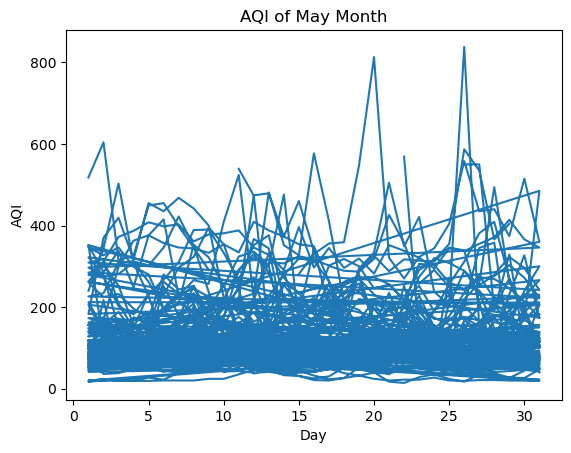

In [59]:
# Now lets plot AQI graph of May month
day = may_data['Day']
aqi = may_data['AQI']

plt.plot(day, aqi);
plt.xlabel("Day")
plt.ylabel("AQI")
plt.title("AQI of May Month")

<Axes: xlabel='Day', ylabel='AQI'>

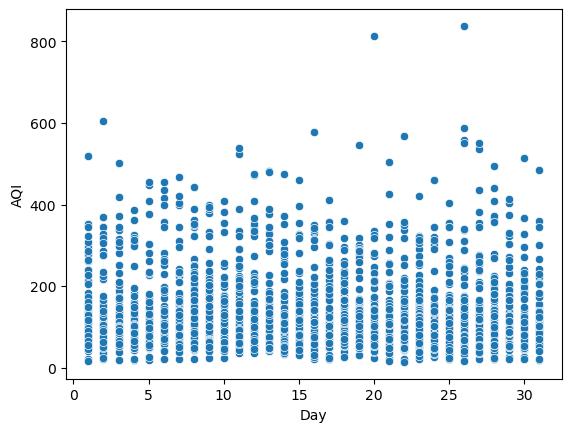

In [68]:
sns.scatterplot(x=day, y=aqi)

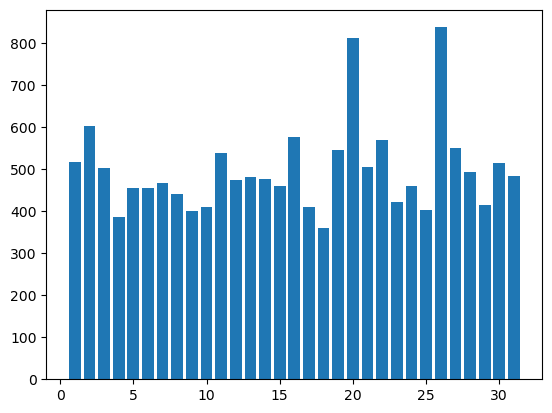

In [71]:
plt.bar(day, aqi);

<Axes: xlabel='Day', ylabel='AQI'>

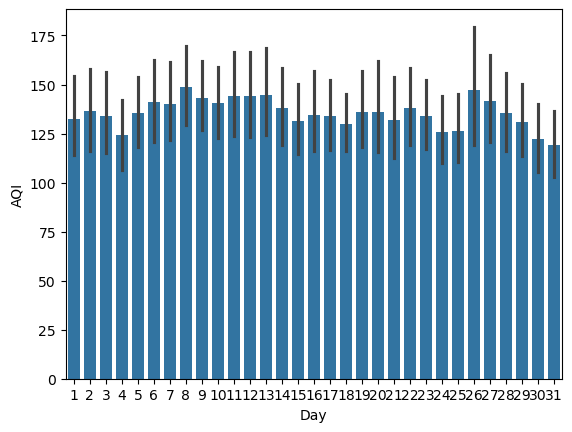

In [73]:
# barplot function can automatically compute averages
ns.barplot(x=day, y=aqi)

In [81]:
# Heatmaps
data = df.pivot_table(index='Month', columns='Year', values='AQI', aggfunc='mean')
data

Year,2015,2016,2017,2018,2019,2020
Month,,,,,,
1,343.000000,280.555556,241.483471,257.365617,265.248201,168.486563
2,418.830189,232.575419,221.282178,235.947619,198.299413,158.036466
3,298.160920,195.510309,170.154135,205.257996,168.744755,110.177267
4,192.224852,187.989950,187.334746,160.778824,154.075092,86.718056
5,193.178378,163.365000,176.815126,148.358650,144.973592,87.446292
6,171.850000,151.802326,128.709016,150.493724,122.222846,76.214674
7,149.625000,144.418502,97.126437,104.597070,102.442761,72.500000
8,156.327957,136.271186,90.996032,111.465517,102.455172,NaN
9,165.067797,138.112000,103.408922,119.902004,93.127451,NaN


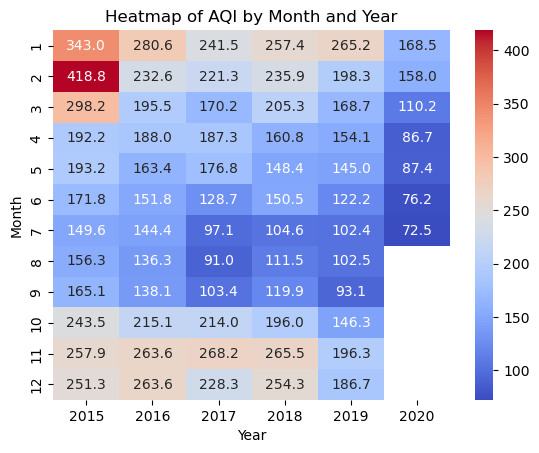

In [83]:
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".1f")  # annot --> values, cmap --> color
plt.title('Heatmap of AQI by Month and Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()